# Evaluation

## Results

#### Auto-Mode
Nutzt eine Heuristic, eine SInE Strategy und eine Selection Function
#### Satauto-Mode
Nutzt eine Heuristic und eine Selection Function

### Importe

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ergebnisse

In [2]:
def summary_grafic(path: str, title: str, output_path: str):
    with open(path, 'r') as file:
        data = json.load(file)
        
    # Result categories
    categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]

    # Extract data for plotting
    files = list(data.keys())
    n_files = len(files)
    n_categories = len(categories)

    # Initialize an array for category counts
    category_counts = np.zeros((n_files, n_categories), dtype=int)

    # Fill the category counts
    for i, (file, results) in enumerate(data.items()):
        for j, category in enumerate(categories):
            category_counts[i, j] = results.get(category, 0)

    # Choose a color palette
    colors = sns.color_palette('pastel', n_categories)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.25
    index = np.arange(n_files)

    # Plot a bar for each category with the chosen colors
    bars = []
    for j, (category, color) in enumerate(zip(categories, colors)):
        bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category, color=color))

    # Add labels, legend, and title
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_title(f'Summary of Prover Results: {title}', fontsize=14, fontweight='bold')
    ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
    ax.set_xticklabels(files, rotation=45, ha='right', fontsize=10)

    # Set y-axis limit
    ax.set_ylim(0, 1000)

    # Adjust the legend
    ax.legend(fontsize=10, title='Category', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

    # Introduce horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Add count labels above the bars
    for bar_group in bars:
        for bar in bar_group:
            yval = bar.get_height()
            if yval > 950:
                label_position = yval - 20
                label_va = 'top'
            else:
                label_position = yval + 10
                label_va = 'bottom'
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                label_position,
                int(yval),
                ha='center', va=label_va, fontsize=9, color='black', weight='bold'
            )

    # Save plot as a PDF with tight layout
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    output_path = path_prefix + output_path
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Usage example
# summary_grafic('summary_auto.json', "Auto-Mode", 'auto_mode_output.pdf')

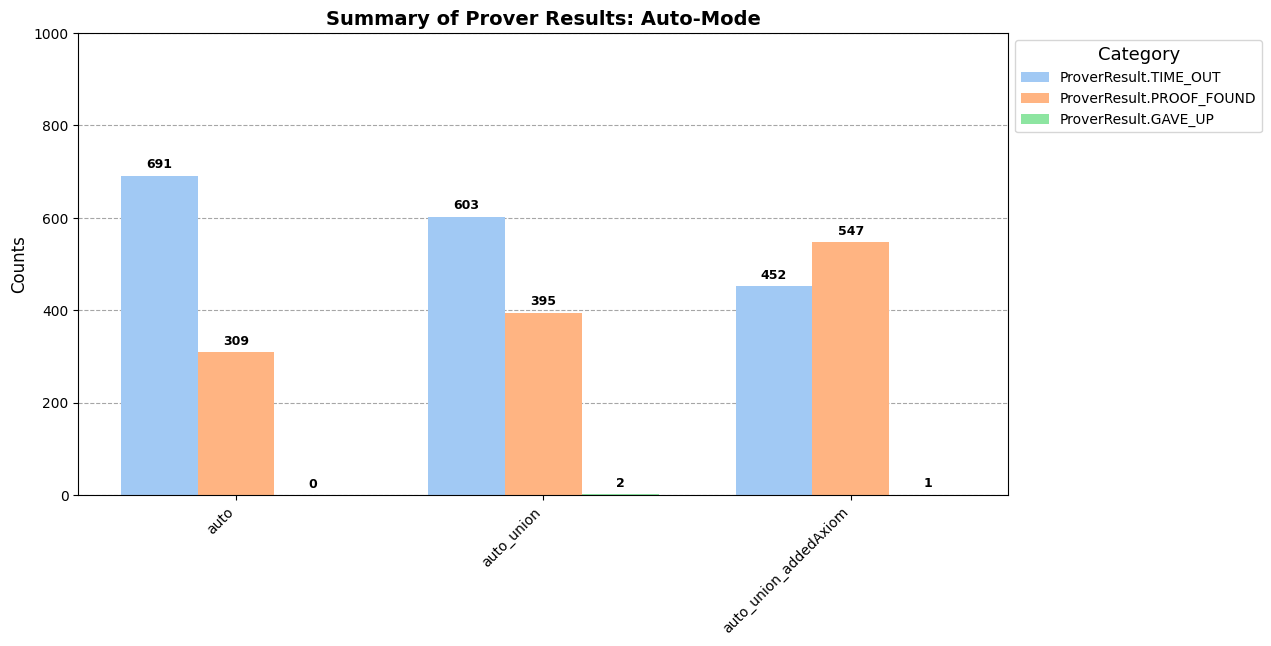

In [6]:
summary_grafic('summary_auto.json', "Auto-Mode", "auto_mode_output.pdf")

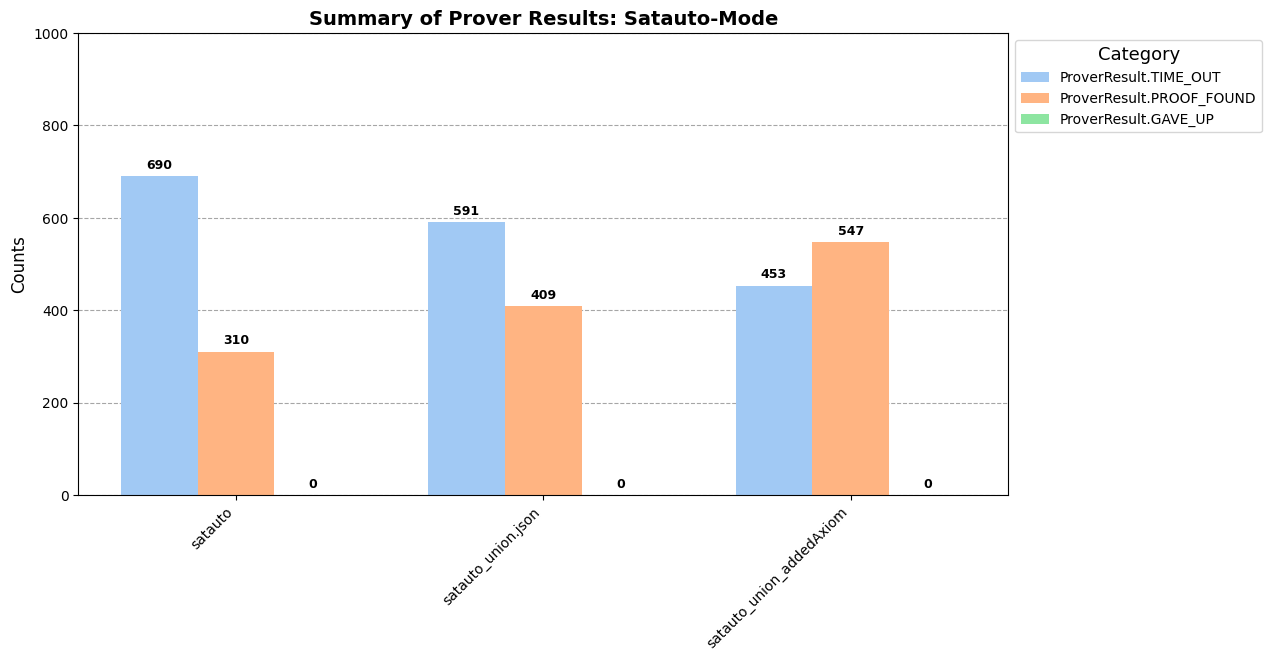

In [7]:
summary_grafic('./summary_satauto.json', "Satauto-Mode", "satauto_mode_output.pdf")

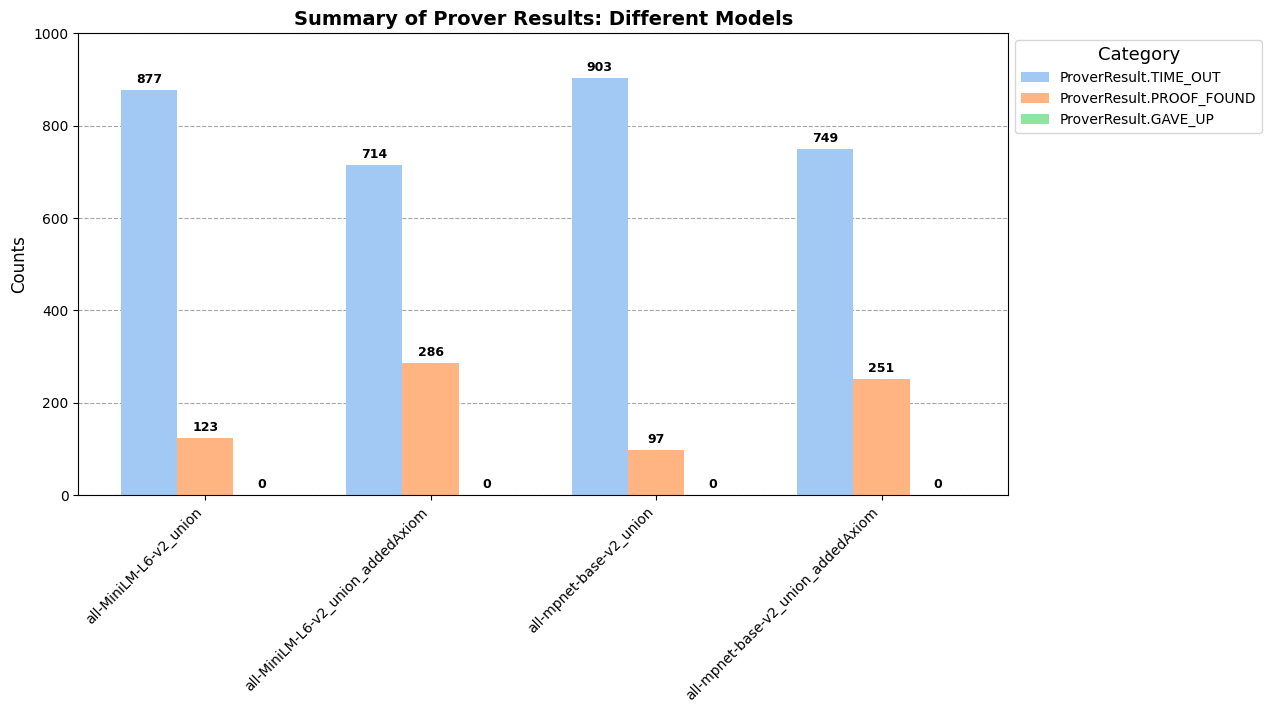

In [5]:
summary_grafic('./summary_otherModule.json', "Different Models", "different_mode_output.pdf")

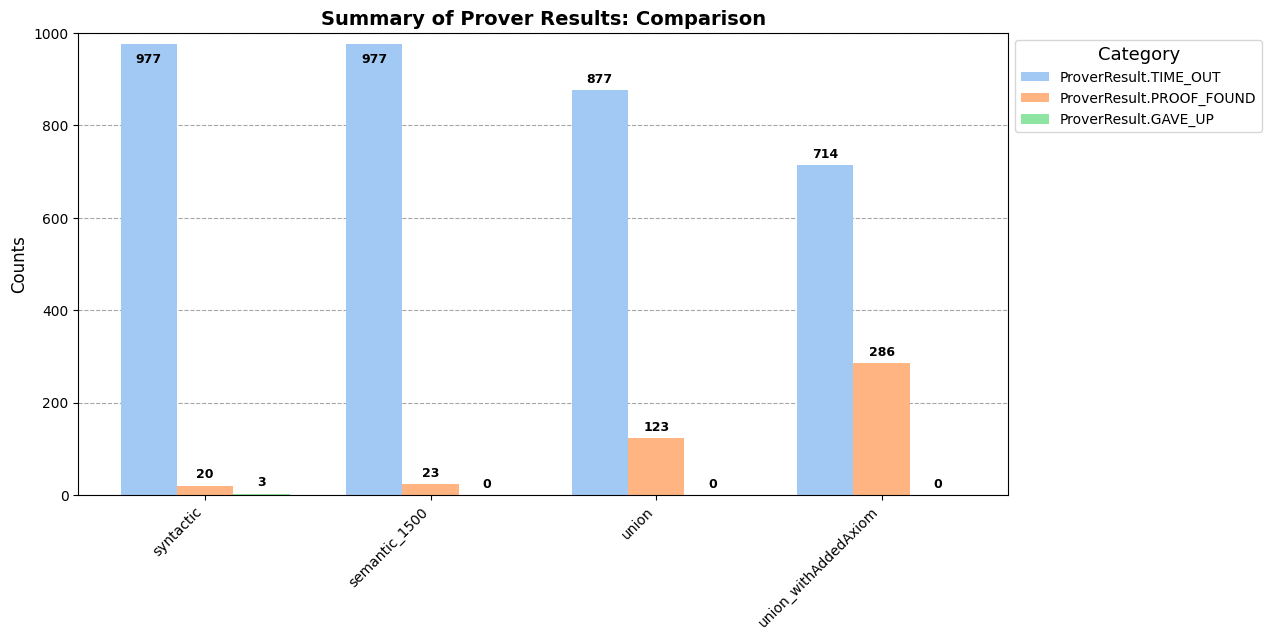

In [9]:
summary_grafic('./summary_starter.json', "Comparison", "standard_mode_output.pdf")

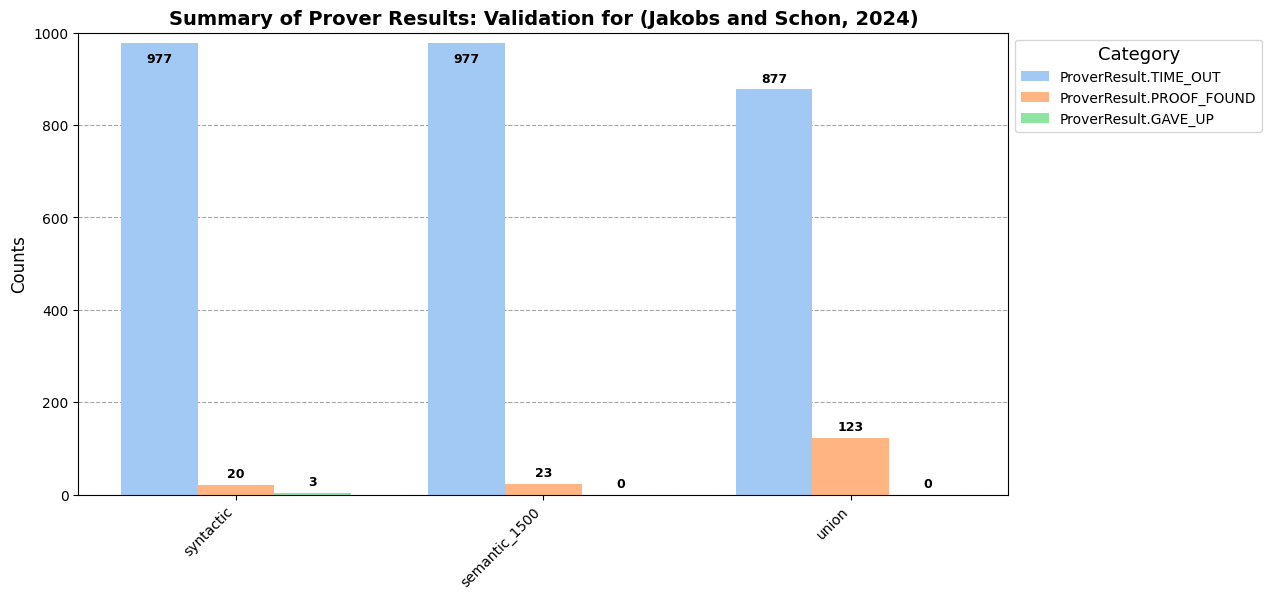

In [5]:
summary_grafic('./summary_starter_noadded.json', "Validation for (Jakobs and Schon, 2024)", "standard_mode_noAdded_output.pdf")

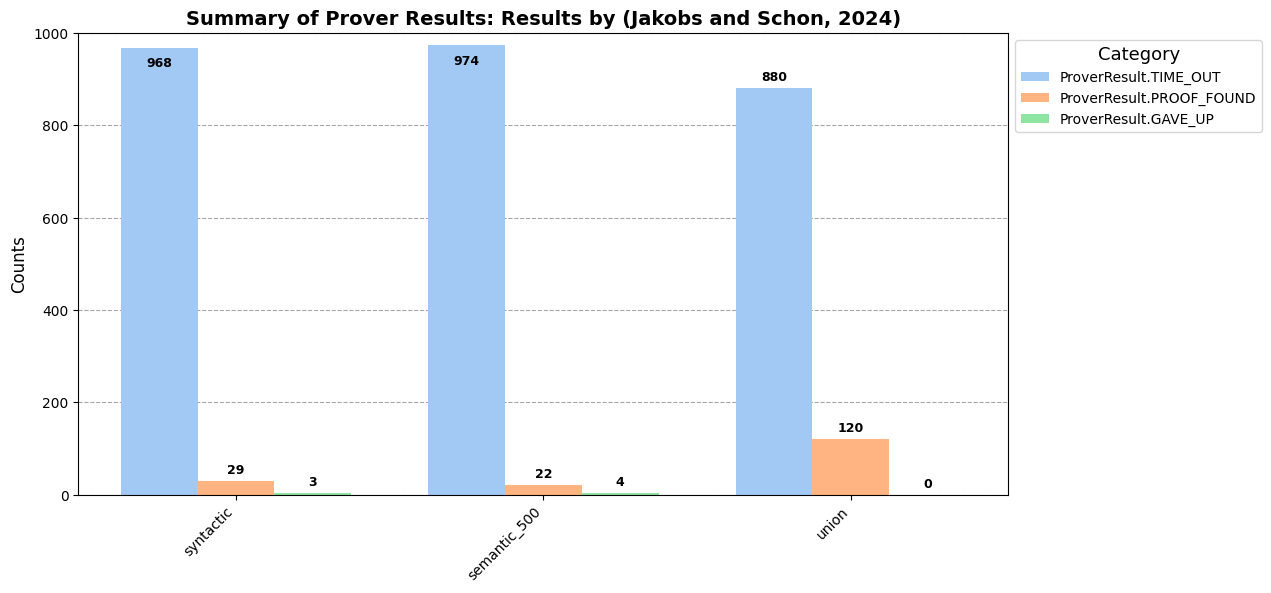

In [4]:
summary_grafic('./summary_starter_noadded_schon.json', "Results by (Jakobs and Schon, 2024)", "standard_mode_noAdded_schon_output.pdf")

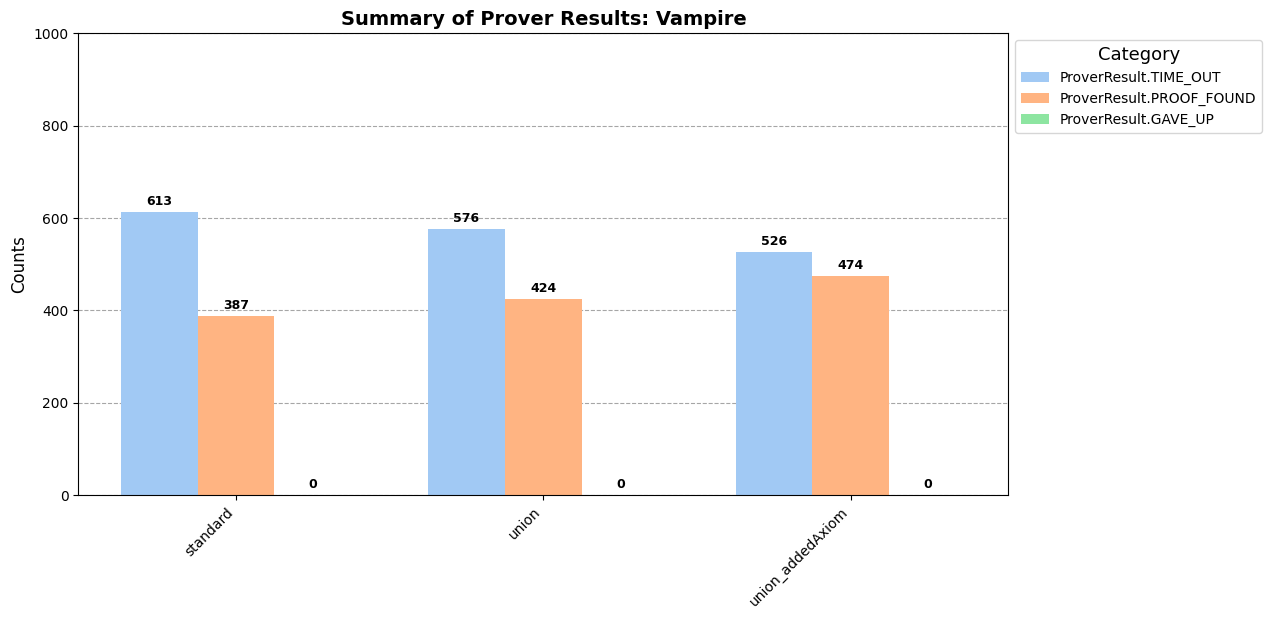

In [4]:
summary_grafic('./summary_vampire.json', "Vampire", "vampire_mode_output.pdf")

# Validation of Jacobs and Schons combined

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def comparison_grafic(path1: str, title1: str, path2: str, title2: str, output_path: str):
    # Load data
    with open(path1, 'r') as f1, open(path2, 'r') as f2:
        data1 = json.load(f1)
        data2 = json.load(f2)

    categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]
    n_categories = len(categories)
    colors = sns.color_palette('pastel', n_categories)

    fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

    for ax, data, title in zip(axes, [data1, data2], [title1, title2]):
        files = list(data.keys())
        n_files = len(files)
        category_counts = np.zeros((n_files, n_categories), dtype=int)

        for i, (file, results) in enumerate(data.items()):
            for j, category in enumerate(categories):
                category_counts[i, j] = results.get(category, 0)

        bar_width = 0.25
        index = np.arange(n_files)

        bars = []
        for j, (category, color) in enumerate(zip(categories, colors)):
            bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category, color=color))

        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
        ax.set_xticklabels(files, rotation=45, ha='right', fontsize=10)
        if ax == axes[0]:
            ax.set_ylabel('Counts', fontsize=12)
        ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
        ax.set_axisbelow(True)
        ax.set_ylim(0, 1000)

        for bar_group in bars:
            for bar in bar_group:
                yval = bar.get_height()
                if yval > 950:
                    label_position = yval - 20
                    label_va = 'top'
                else:
                    label_position = yval + 10
                    label_va = 'bottom'
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    label_position,
                    int(yval),
                    ha='center', va=label_va, fontsize=9, color='black', weight='bold'
                )

    # Shared legend above the plots
    handles, labels = axes[0].get_legend_handles_labels()
    # Shared legend below the plots
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc='lower center',
        ncol=len(categories),
        fontsize=11,
        title='Category',
        title_fontsize='13',
        bbox_to_anchor=(0.5, -0.05)  # Centered below the plots
    )

    # Adjust layout to make space for the legend at the bottom
    fig.tight_layout(rect=[0, 0.05, 1, 1])

    # Save the figure
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    plt.savefig(path_prefix + output_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Example usage:
# comparison_grafic(
#     './summary_starter_noadded.json', "Validation for (Jakobs and Schon, 2024)",
#     './summary_starter_noadded_schon.json', "Results by (Jakobs and Schon, 2024)",
#     "comparison_output.pdf"
# )


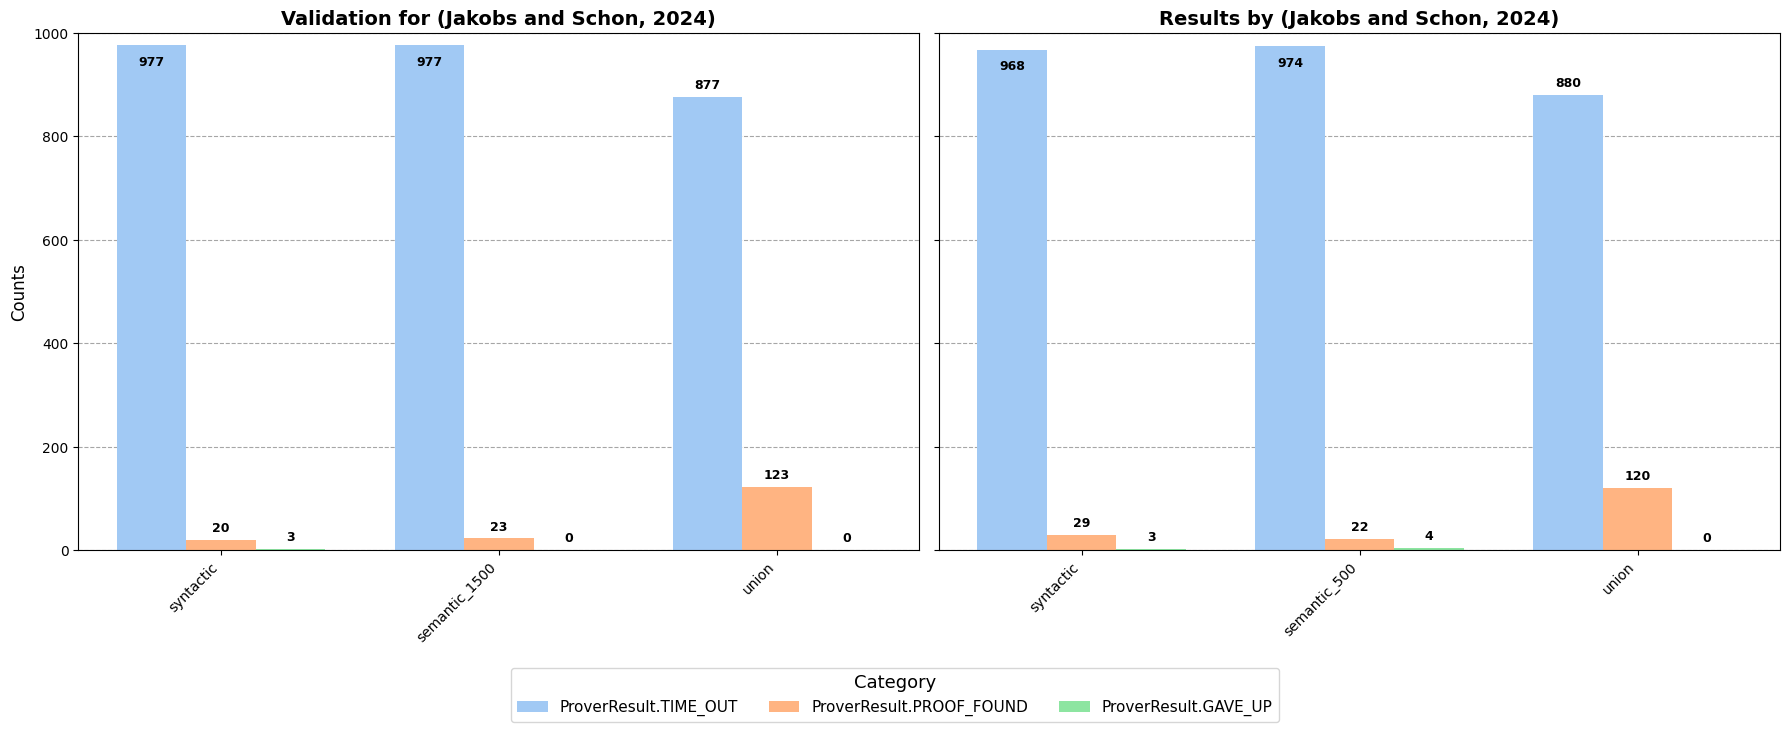

In [11]:
comparison_grafic(
   './summary_starter_noadded.json', "Validation for (Jakobs and Schon, 2024)",
   './summary_starter_noadded_schon.json', "Results by (Jakobs and Schon, 2024)",
      "comparison_output.pdf"
)

In [33]:
import json

def get_keys_with_proof_found(file_path):
    keys_with_proof = []
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    for key, value in data.items():
        if value[0] == "ProverResult.PROOF_FOUND":
            keys_with_proof.append(key)
    
    return keys_with_proof

# Specify the path to your JSON file
json_file_path_added = 'noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-MiniLM-L6-v2_addedAxiom8000_2ndRun.json'
json_file_path = 'noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-MiniLM-L6-v2_None_2ndRun.json'
keys_added = get_keys_with_proof_found(json_file_path_added)
keys = get_keys_with_proof_found(json_file_path)


In [34]:
common_proofs = []
for i in keys_added:
    if i in keys:
        common_proofs.append(i)

In [35]:
just_in_noAdded = []
for i in keys:
    if i not in keys_added:
        just_in_noAdded.append(i)

In [36]:
with open('noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-MiniLM-L6-v2_None_2ndRun.json', 'r') as f:
        no_added_data = json.load(f)
with open('noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-MiniLM-L6-v2_addedAxiom8000_2ndRun.json', 'r') as f:
        added_data = json.load(f)

In [37]:
time_just_in_noAdded = {}
for i in just_in_noAdded:
    time = no_added_data[i][2]
    time_just_in_noAdded[i] = time

In [38]:
time_just_in_noAdded

{}